In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import linalg as LA

N = 25

M = 25

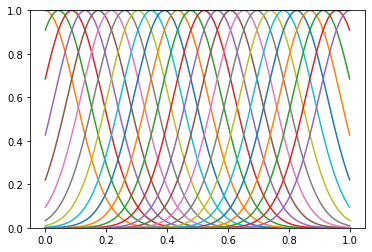

In [7]:
#ガウス関数の表示

def gaussian_basis(x):
  gamma = 50
  x_ = np.linspace(0,1, M-1)
  h = np.exp(-(x - x_) ** 2 * (gamma))
  return np.append(1, h)

X = np.linspace(0,1,100)
Y = np.array([gaussian_basis(x) for x in X])
plt.plot(X, Y)
plt.ylim(0,1)
plt.show()

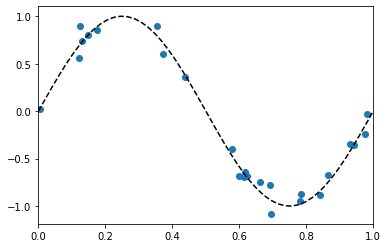

In [10]:
# データ点
train_X = np.random.uniform(0,1,size=N)
train_t = np.sin(2*train_X*np.pi) + np.random.normal(0,0.1,N)
plt.scatter(train_X, train_t)
plt.xlim(0,1)
x_ = np.linspace(0,1)
plt.plot(x_, np.sin(2*x_*np.pi), 'k--')
plt.show()

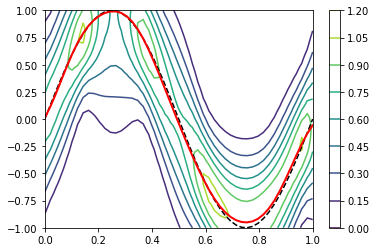

In [24]:
# 予測分布
Phi = np.array([ gaussian_basis(x) for x in train_X]) 
alpha = 0.1
beta = 9
S_N = np.linalg.inv( alpha * np.eye(M) + beta * Phi.T@Phi)
m_N = beta * S_N @ Phi.T @ train_t
def sigma(x):
    return np.sqrt(1./ beta + gaussian_basis(x).dot(S_N).dot(gaussian_basis(x)))
 
def m(x):
    return m_N.dot(gaussian_basis(x))
 
def pred_dist(x, t):
    return norm(m(x), sigma(x)).pdf(t)

X, Y = np.meshgrid(np.linspace(0, 1), np.linspace(-1, 1))
Z = np.vectorize(pred_dist)(X, Y)
plt.contour(X,Y,Z)
plt.colorbar()
x_ = np.linspace(0,1)
plt.plot(x_, np.sin(2 * np.pi * x_), 'k--', label=True)
plt.plot(x_, np.vectorize(m)(x_), "r", linewidth=2.0, label="predict")
plt.show()

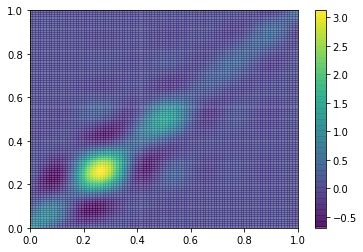

In [33]:
# カーネル関数
def k(x,x_):
  return beta * gaussian_basis(x).T @ S_N @ gaussian_basis(x_)

X, Y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
Z = np.vectorize(k)(X,Y)
plt.pcolor(X,Y,Z, alpha=0.7)
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show() 

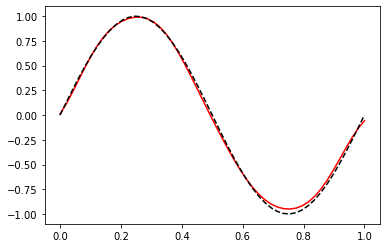

In [42]:
#カーネル関数の重み付け和
def kernel_function(x):
  return np.sum(np.array([ k(x,x_)*train_t[i] for i,x_ in enumerate(train_X) ]))

X = np.linspace(0,1)
Z = np.vectorize(kernel_function)(X)
plt.plot(X,Z, "r-", label="predict")
plt.plot(x_, np.sin(2 * np.pi * x_), "k--", label="true")
plt.show()

In [44]:
# パラメータ
alpha = 0.1
beta = 9

def poly_basis(x):
  return x**np.arange(M)

def gaussian_basis(x):
  gamma = 50
  x_ = np.linspace(0,1,M-1)
  return np.append(1, np.exp( - (x - x_)**2 * (gamma)))

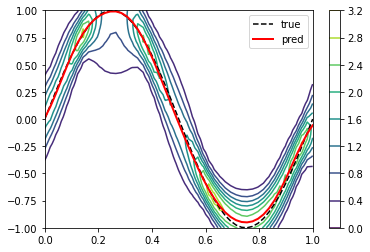

In [47]:
# 適当なalpha,betaの場合
alpha = 0.1
beta = 9

Phi = np.array([ gaussian_basis(x) for x in train_X])
S_N = np.linalg.inv(alpha * np.eye(M) + beta * Phi.T@Phi)
m_N = beta * S_N @ Phi.T @ train_t

def sigma(x):
  return (1/beta + gaussian_basis(x).T@S_N@gaussian_basis(x))

def m(x):
  return m_N.T @ gaussian_basis(x)

def pred_dist(x,t):
  return norm(m(x), sigma(x)).pdf(t)

X, Y = np.meshgrid(np.linspace(0,1), np.linspace(-1,1))
Z = np.vectorize(pred_dist)(X,Y)
plt.contour(X,Y,Z)
plt.colorbar()
plt.plot(x_, np.sin(2 * np.pi * x_), "k--", label="true")
 
plt.plot(x_, np.vectorize(m)(x_), "r", linewidth=2.0, label="pred")
plt.legend()
plt.show()

In [61]:
# エビデンス推定
Phi = np.array([ gaussian_basis(x) for x in train_X])
S_N = np.linalg.inv(alpha * np.eye(M) + beta * Phi.T@Phi)
m_N = beta * S_N @ Phi.T @ train_t
alpha = 0.1
beta = 9
w_, v_ = np.linalg.eig(Phi.T@Phi)

for i in range(10):
  w = beta * w_
  S_N = np.linalg.inv(alpha * np.eye(M) + beta * Phi.T@Phi)
  m_N = beta * S_N @ Phi.T @ train_t
  gamma = (w/(w+alpha)).sum()
  alpha = gamma / (m_N.T @ m_N)
  beta = (N-gamma) / (LA.norm(train_t - Phi@m_N) ** 2)
  print(beta, alpha)

85.52901465247292 11.113271062867652
90.63794327639367 13.47515454894017
90.78825669215009 13.434860422342163
90.7838686028695 13.436343521759238
90.78401934818928 13.436293013873678
90.78401420213878 13.436294738590902
90.78401437784896 13.436294679701584
90.78401437184907 13.436294681712466
90.78401437205399 13.436294681643783
90.78401437204789 13.436294681645823


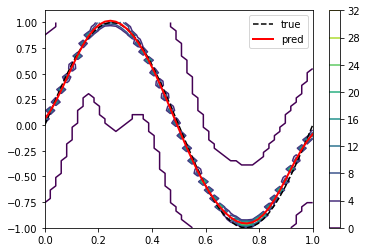

In [62]:
X, Y = np.meshgrid(np.linspace(0, 1), np.linspace(-1, 1))
Z = np.vectorize(pred_dist)(X, Y)
plt.contour(X, Y, Z)
plt.colorbar()
x_ = np.linspace(0, 1)
plt.plot(x_, np.sin(2 * np.pi * x_), "k--", label="true")
 
plt.plot(x_, np.vectorize(m)(x_), "r", linewidth=2.0, label="pred")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22259 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23455 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_

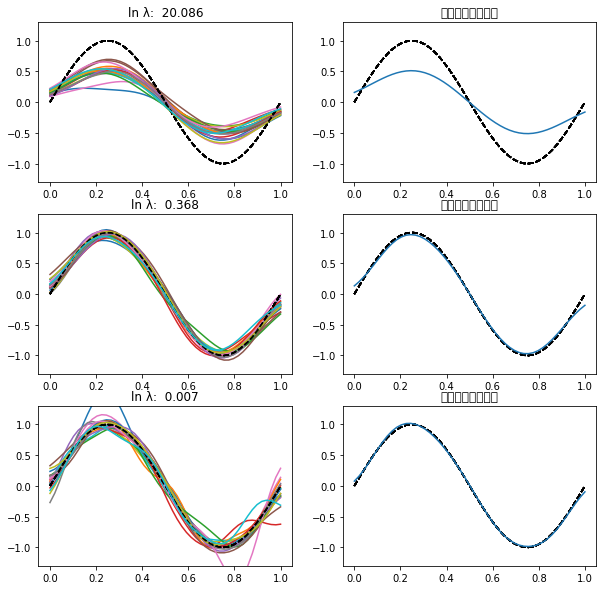

In [63]:
#おまけ
#リッジ回帰
def model_y(x):
    Phi = np.array([gaussian_basis(d) for d in train_X])
    w = LA.solve(Phi.T.dot(Phi) + lam * np.eye(M), Phi.T.dot(train_t))
    return w.dot(gaussian_basis(x))
 
 
#図示
fig, axes = plt.subplots(3, 2, figsize=(10,10))
for j in range(3):
    lam = [np.exp(3), np.exp(-1), np.exp(-5)][j]
    y_list = []
    for i in range(20):
        np.random.seed(i)
        #25個のデータ点を毎回生成する
        train_X = np.random.uniform(0, 1, N)
        train_t = np.sin(2 * np.pi *train_X) + np.random.normal(0, 0.1, N)
 
        x_ = np.linspace(0, 1)
        axes[j, 0].plot(x_, np.sin(2 * np.pi * x_), "k--")
        y = np.vectorize(model_y)(x_)
        y_list.append(y)
        axes[j, 0].plot(x_, y)
        axes[j, 1].plot(x_, np.sin(2 * np.pi * x_), "k--")
        axes[j, 0].set_ylim(-1.3, 1.3)
        axes[j, 0].set_title(u"ln λ:  {}".format(lam.round(3)))
    axes[j, 1].plot(x_, np.average(np.array(y_list), axis=0))
    axes[j, 1].set_ylim(-1.3, 1.3)
    axes[j, 1].set_title(u"左図の実線の平均")
 
 
plt.show()

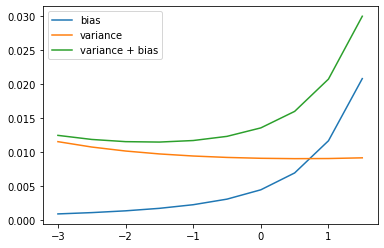

In [64]:
y_list_list = []
for j in range(10):
    y_list = []
    lam = np.exp(-3 + 0.5 * j)
    for i in range(20):
        np.random.seed(i)
        #25個のデータ点を毎回生成する
        train_X = np.random.uniform(0, 1, N)
        train_t = np.sin(2 * np.pi *train_X) + np.random.normal(0, 0.1, N)
        x_ = np.linspace(0, 1)
        y = np.vectorize(model_y)(x_)
        y_list.append(y)
    y_list_list.append(y_list)
 
bias_list = []
for i in range(10):
    tmp = np.average(np.array(y_list_list[i]), axis=0) - np.sin(2 * np.pi * x_)
    bias = tmp.dot(tmp) / 50.
    bias_list.append(bias)
 
variance_list = []
tmp2_list = []
for i in range(10):
    for j in range(20):
        tmp = y_list_list[i][j] - np.average(np.array(y_list_list[i]), axis=0)
        tmp2 = tmp.dot(tmp) / 20.
        tmp2_list.append(tmp2)
    variance = np.average(tmp2_list)
    variance_list.append(variance)
 
x = [-3 + 0.5 * j for j in range(10)]
plt.plot(x, bias_list, label= "bias")
plt.plot(x, variance_list, label= "variance")
plt.plot(x, np.array(variance_list) + np.array(bias_list), label= "variance + bias")
plt.legend(loc="upper left")
plt.show()